## Transformation of Features

1. Why feature transformations are required?

In Machine Learning there are different features in any dataset that are of different units and magnitudes. And transformation is required for algorithms which involves Eucledian Distance or Gradient Descent.

- Linear Regression, Logistic Regression, ANN ------------- Gradient Descent ------------- Global Minima
- KNN, K-Means, Hierarichal Clustering ------------- Eucledian Distance

Also in an image dataset the data is basically pixels which range from 0 to 255 (CNN). 

### Types of Transformation

1. Standardization
2. Scaling to Minimum & Maximum Values (Normalization)
3. Scaling to Median & Quantiles
4. Gaussian Transformation

    1. Logarithmic Transformation
    2. Reciprocal Transformation
    3. Square Root Transformation
    4. Exponential Transformation
    5. Box-Cox Transformation

#### Standardization

Standardization comes into picture when features of input dataset have large differences between their or simply when they are measured in different units (Pounds, miles, Meters, etc...)

We try to bring all the variables to the same scale. Standardization means centering the variable at 0. It is actually bringing the variables to the Standard Normal form with Mean= 0 and Standard Deviation= 1. The Formulae is:- 


<div align= 'center'><b> 
    
    Z = (xi - Xbar)/sigma

</b></div>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'age', 'fare']]
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
 df['age'].fillna(df.age.median(), inplace= True)

In [4]:
df.isnull().any()

survived    False
pclass      False
age         False
fare        False
dtype: bool

In [5]:
### Independent and Dependent Features
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X.head(10)

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
5,3,28.0,8.4583
6,1,54.0,51.8625
7,3,2.0,21.0750
8,3,27.0,11.1333
9,2,14.0,30.0708


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [8]:
### Standardization: For standardization we use StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()     #### initialize
### Perform fit_transform
X_trainScaled = scaler.fit_transform(X_train)    #### Here when fit is applied the Mean and Std is calculated and then the data is transformed.

In [10]:
X_trainScaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [11]:
X_testScaled = scaler.transform(X_test)   #### We use the same Mean and Std from the training data. So here we just use transform

In [12]:
#### Build Model
from sklearn.linear_model import LogisticRegression

In [13]:
classification = LogisticRegression()
classification.fit(X_trainScaled, y_train)

y_pred = classification.predict(X_testScaled)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

#### Min-Max Scaling

This is usually used in CNN (Deep Learning). Here all the features are reduced to between 0 to 1. The Formulae is:-

<div align= 'center'><b> 
    
    X_scaled = (xi - xMax)/(xMax - xMin)

</b></div>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
minmax = MinMaxScaler()
train_minmax = pd.DataFrame(minmax.fit_transform(X_train), columns= X_train.columns)
train_minmax.head()

,pclass,age,fare
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


In [17]:
test_minmax = pd.DataFrame(minmax.transform(X_test), columns= X_test.columns)

In [18]:
#### Build Model
from sklearn.linear_model import LogisticRegression

In [19]:
classification = LogisticRegression()
classification.fit(train_minmax, y_train)

y_pred = classification.predict(test_minmax)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

#### Robust Scaler

Robust Scaler is robust to outliers. It is used for scaling the features to median and Standard Deviation. The Formulae is:-

<div align= 'center'><b> 
    
    IQR = 75th Quantile (Q3) - 25th Quantile (Q1)
    
    X_scaled = (xi - xMedian)/IQR

</b></div> 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
robust = RobustScaler()
train_robust = pd.DataFrame(robust.fit_transform(X_train), columns= X_train.columns)
train_robust.head()

,pclass,age,fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [23]:
test_robust = pd.DataFrame(robust.transform(X_test), columns= X_test.columns)

In [24]:
#### Build Model
from sklearn.linear_model import LogisticRegression

In [25]:
classification = LogisticRegression()
classification.fit(train_minmax, y_train)

y_pred = classification.predict(test_minmax)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

### Gaussian Transformation

Some ML Algorithms like Linear, Logistic, etc... and also DL Algorithm like ANN assumes that the features follow a Normal Distribution. This is help the models perform better and also will increase the Accuracy. For this we have some transformations that will convert the Non-Gaussian Features to Gaussian Features.
 
1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square-Root Transformation
4. Exponential Transformation (More General, You can use any exponent)
5. Box-Cox Transformation

In [26]:
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


#### Checking for Normality (Q-Q Plot)

To determine the normality, there are also several statistical tests out there such as the Kolmogorov–Smirnov test and the Shapiro–Wilk test.

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

In [28]:
def QQPlot(df, feature):
    plt.figure(figsize= (18, 7))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist='norm', plot= pylab)
    plt.show()

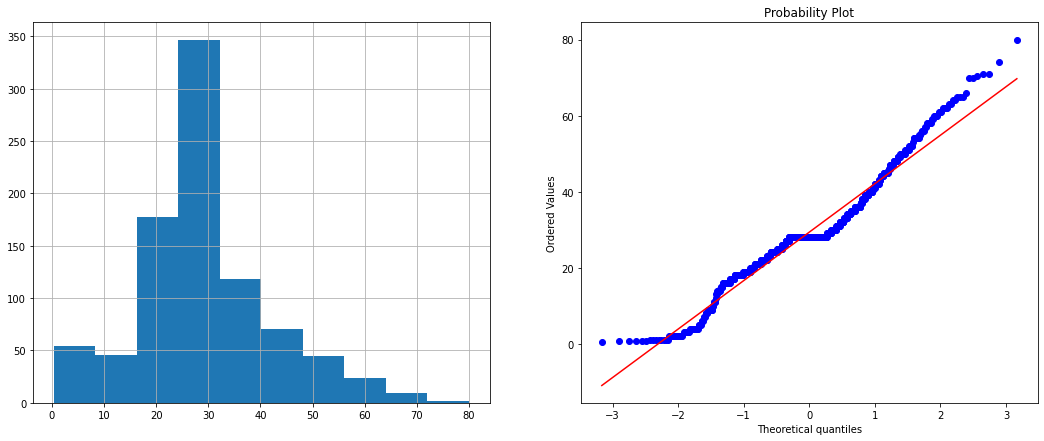

In [29]:
QQPlot(df, 'age')

- Here the plot is not exactly Normal. We can say that this is infact Right-Skewed Distribution.
- Also in the Q-Q Plot, the data points don't exactly fall in a straight line.

#### Logarithmic Transformation

For every feature we try to apply log.

In [30]:
import numpy as np

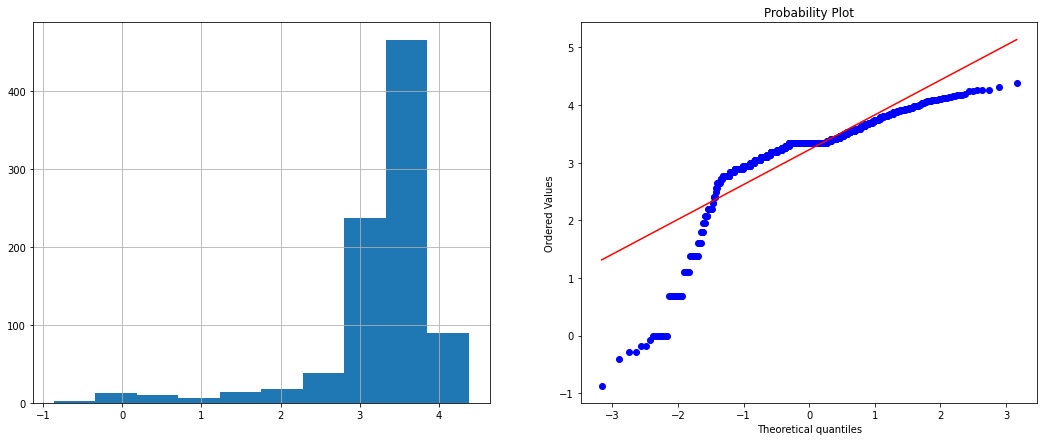

In [31]:
df['Age_log'] = np.log(df['age'])    #### Apply Log on each observation
QQPlot(df, 'Age_log')

- Here the plot is not exactly Normal. We can say that this is a Left-Skewed Distribution.
- Also in the Q-Q Plot, the data points are far off from the straight line.

#### Reciprocal Transformation

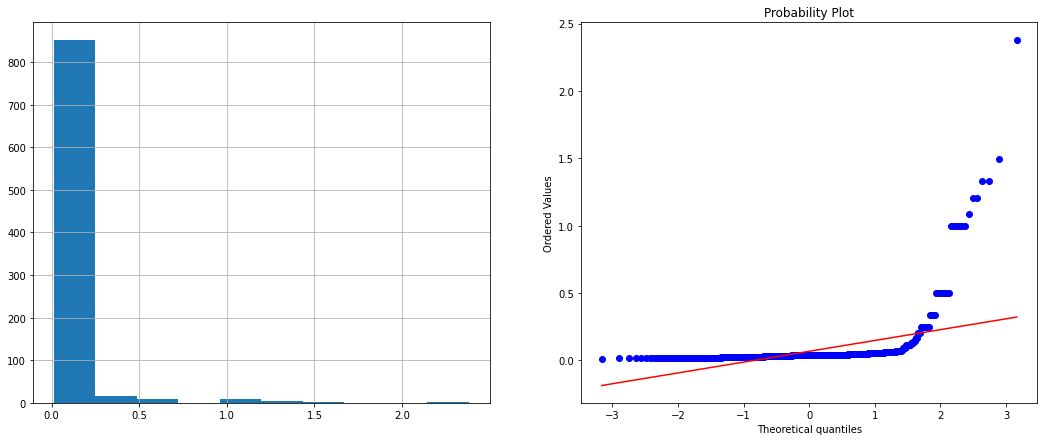

In [32]:
df['Age_reci'] = 1/(df['age'])     #### Take the reciprocal of each observation in the specific Feature.
QQPlot(df, 'Age_reci')

- Here the plot is not exactly Normal. We can say that this is a Right-Skewed Distribution.
- Also in the Q-Q Plot, the data points are really far off from the straight line.

#### Square-Root Transformation

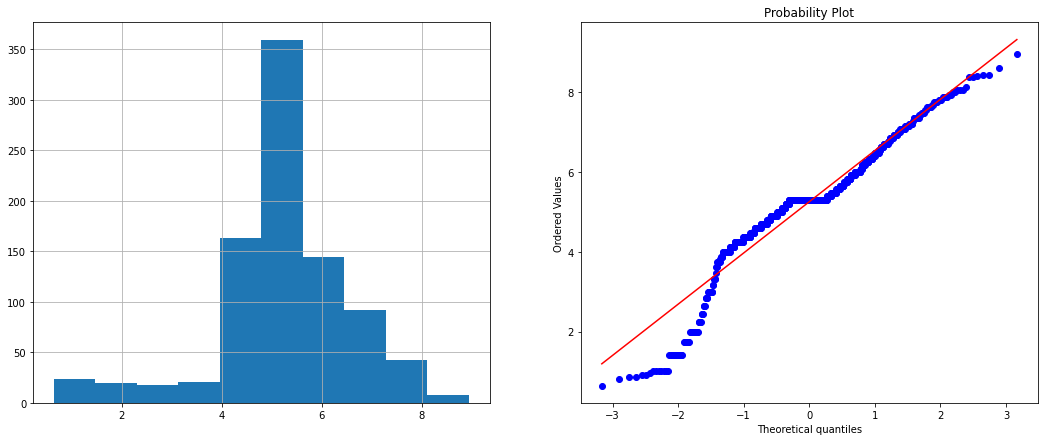

In [33]:
df['Age_square'] = df['age']**(1/2)
QQPlot(df, 'Age_square')

- Here the plot looks somewhat Normal. But we can say that this has a small amount of Left-Skewed Distribution.
- Also in the Q-Q Plot, the data points are in the straight line.

#### Exponential Transformation

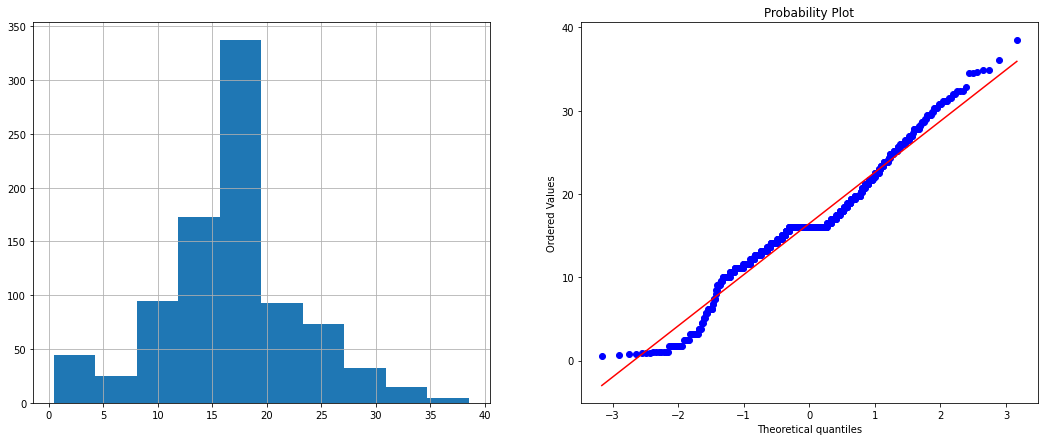

In [34]:
df['Age_exp'] = df['age']**(1/1.2)
QQPlot(df, 'Age_exp')

- Here the plot looks pretty good for a Normal Distribution.
- Also in the Q-Q Plot, most of the data points are in the straight line.

#### Box-Cox Transformation

The Box-Cox Transformation is defined as:-

<div align= 'center'><b> 
    
    T(Y) = (Yexp(λ)-1)/λ

</b></div>

- Y: Response variable
- λ: Transformation parameter (varies from -5 to 5)

In the transformation, all values of λ are considered and the optimal value for the given variable is selected. We can get the λ value from ***stats.boxcox(feature)*** 

In [35]:
df['Age_boxcox'], parameters = stats.boxcox(df['age'])
parameters

0.7964531473656952

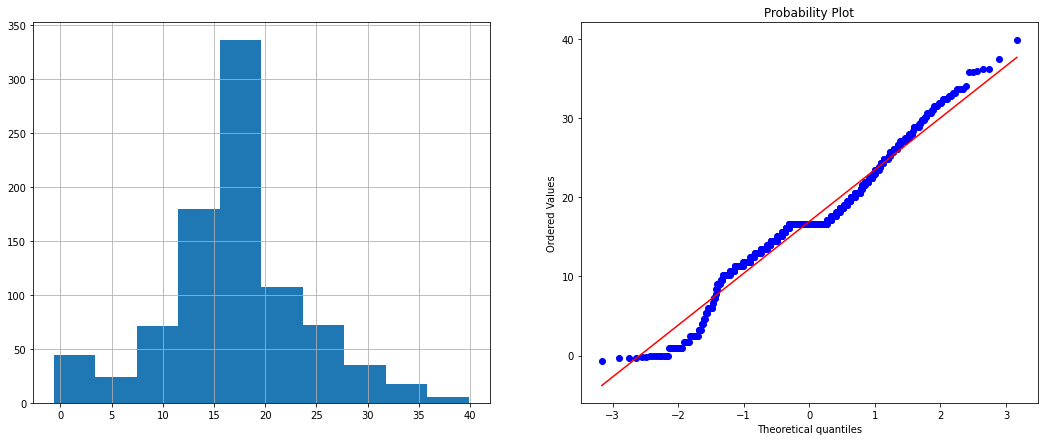

In [36]:
QQPlot(df, 'Age_boxcox')

- Here the plot looks pretty good for a Normal Distribution.
- Also in the Q-Q Plot, most of the data points are in the straight line.

<h4 align= 'center'> We can thus go with either Exponential or Box-Cox Transformations </h4>